# Import Required Libraries
Import the necessary libraries, including the socket library.

In [1]:
# Import necessary libraries
import socket # for creating TCP connections
import select

# Create TCP Connection
Create a TCP connection to the specified host and port using the socket library.

In [2]:
# Create TCP connection to specified host and port
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # create socket object
host = '192.168.0.23' # specify host
port = 5555 # specify port
client_socket.connect((host, port)) # connect to host and port

# Send simple command

In [15]:
client_socket.send(":SING\n".encode())
client_socket.send(":TRIG:STAT?\n".encode())
cmdres = client_socket.recv(1024)
print(cmdres.decode())


STOP



# Get memory depth

In [15]:
# Define number of horizontal grid divisions for DS1054Z
h_grid = 12

# ACQuire:MDEPth
client_socket.send(":ACQ:MDEP?\n".encode())
mdep = client_socket.recv(1024).decode()
print(mdep)

# if mdep is "AUTO"
if mdep == "AUTO\n":
    # ACQuire:SRATe
    client_socket.send(":ACQ:SRAT?\n".encode())
    srate = client_socket.recv(1024).decode()

    # TIMebase[:MAIN]:SCALe
    client_socket.send(":TIM:SCAL?\n".encode())
    scal = client_socket.recv(1024).decode()

    # mdep = h_grid * scal * srate
    mdep = h_grid * float(scal) * float(srate)

print(int(mdep))

AUTO

150


# Get channel data
Send the specified message over the TCP connection using the send() function.

In [3]:

client_socket.send(":WAV:SOUR CHAN1\n".encode())
client_socket.send(":WAV:MODE RAW\n".encode())
client_socket.send(":WAV:FORM BYTE\n".encode())

client_socket.send(":WAV:STAR 1\n".encode())
client_socket.send(":WAV:STOP 250000\n".encode())

client_socket.send(":WAV:DATA?\n".encode())


# Receive response over TCP connection until no more data
response = client_socket.recv(260000)
while True:
    rlist, _, _ = select.select([client_socket], [], [], 0.1)
    if not client_socket in rlist:
        break
    response += client_socket.recv(260000)

response = response[11:]
print("End of script")

# print(len(response))
# print(response)


End of script


## Plot the response

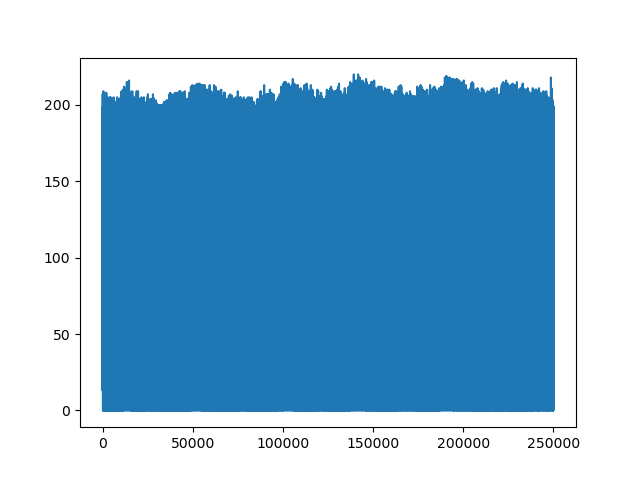

In [5]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np


# Convert response which is byte string of uint8 values to numpy array
data = np.frombuffer(response, dtype=np.uint8)

plt.plot(data, '-')
plt.show()